# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv(r"D:\数据原料\penguins.csv")
original_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 评估和清理数据

In [3]:
cleaned_data = original_data.copy()

### 数据整齐度

In [4]:
cleaned_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### 数据干净度

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


`culmen_length_mm`与`culmen_depth_mm`,`flipper_length_mm`,``存在少量缺失值,可以先提取出来观察一下,且观察到`species`,`island`,`sex`是分类数据，Python推荐使用category因为节省空间

In [6]:
cleaned_data['species'] = cleaned_data['species'].astype("category")

In [7]:
cleaned_data['island'] = cleaned_data['island'].astype("category")

In [8]:
cleaned_data['sex'] = cleaned_data['sex'].astype("category")

In [9]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


### 处理缺失数据

先提取出`culmen_length_mm`,`culmen_depth_mm`,`flipper_length_mm`,`body_mass_g`的缺失值进行观察

In [10]:
cleaned_data.query('culmen_length_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [11]:
cleaned_data.query('culmen_depth_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [12]:
cleaned_data.query('flipper_length_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [13]:
cleaned_data.query('body_mass_g.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


以上有关企鹅属性的数据都缺失了，没有参考价值，可以删除

In [14]:
cleaned_data.drop(3,inplace = True)
cleaned_data.drop(339,inplace = True)

In [15]:
cleaned_data.query('sex.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


但是其性别和所要分析的目标是不冲突的，所以可以不用删去

### 处理重复数据

据观察，这里的数据是可以重复的

### 处理不一致数据

不一致数据可能存在于分类变量中

In [16]:
cleaned_data['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [17]:
cleaned_data['island'].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [18]:
cleaned_data['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [19]:
cleaned_data['sex'] = cleaned_data['sex'].replace('.',np.nan)

C:\Users\123\AppData\Local\Temp\ipykernel_8328\309012409.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_data['sex'] = cleaned_data['sex'].replace('.',np.nan)


In [20]:
cleaned_data['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

不存在不一致数据

### 处理无效或错误数据

In [21]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


并没有出现无效或错误数据

### 保存数据

In [22]:
cleaned_data.to_csv("penguins.csv",index = False)

In [23]:
pd.read_csv("penguins.csv").head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
7,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
8,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
9,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN


## 探索数据

In [24]:
sns.set_palette("pastel")

In [25]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 企鹅种类比例

([<matplotlib.patches.Wedge at 0x26f3ff85810>,
 [Text(0.20095570279004357, 1.0814882364206093, 'Adelie'),
  Text(-0.7954730250570456, -0.7597517136582143, 'Gentoo'),
  Text(0.892288738448971, -0.6432890541872635, 'Chinstrap')],
 [Text(0.10961220152184194, 0.5899026744112414, '44.2%'),
  Text(-0.433894377303843, -0.41441002563175316, '36.0%'),
  Text(0.48670294824489324, -0.3508849386475982, '19.9%')])

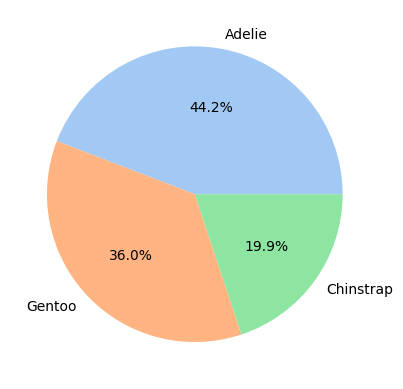

In [39]:
species_count = cleaned_data['species'].value_counts()
plt.pie(species_count,autopct = '%.1f%%',labels = species_count.index)

### 企鹅所属岛屿比例

([<matplotlib.patches.Wedge at 0x26f40028f50>,
 [Text(0.040408993903112124, 1.0992575281578645, 'Biscoe'),
  Text(-0.5324063168406664, -0.9625713032228604, 'Dream'),
  Text(0.9814795839173, -0.49668684938653646, 'Torgersen')],
 [Text(0.022041269401697518, 0.5995950153588351, '48.8%'),
  Text(-0.2904034455494544, -0.5250388926670148, '36.3%'),
  Text(0.5353525003185272, -0.2709200996653835, '14.9%')])

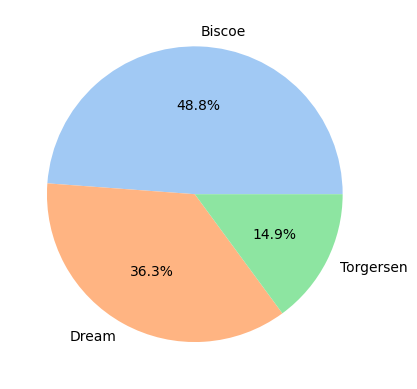

In [43]:
island_count = cleaned_data['island'].value_counts()
plt.pie(island_count,autopct = '%.1f%%',labels = island_count.index)

### 企鹅性别比例

([<matplotlib.patches.Wedge at 0x26f4002bed0>,
 [Text(-0.01556599676421093, 1.0998898580061263, 'MALE'),
  Text(0.015565699568373776, -1.0998898622120976, 'FEMALE')],
 [Text(-0.008490543689569597, 0.5999399225487961, '50.5%'),
  Text(0.008490381582749331, -0.5999399248429623, '49.5%')])

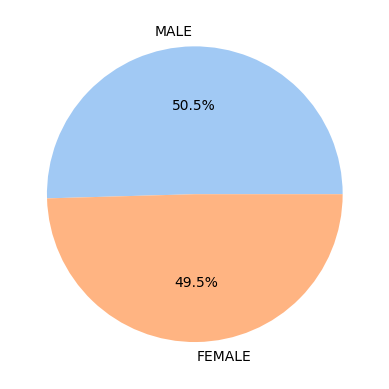

In [45]:
sex_count = cleaned_data['sex'].value_counts()
plt.pie(sex_count,autopct = '%.1f%%',labels = sex_count.index)

### 不同岛屿上企鹅种类数量

<Axes: xlabel='island', ylabel='count'>

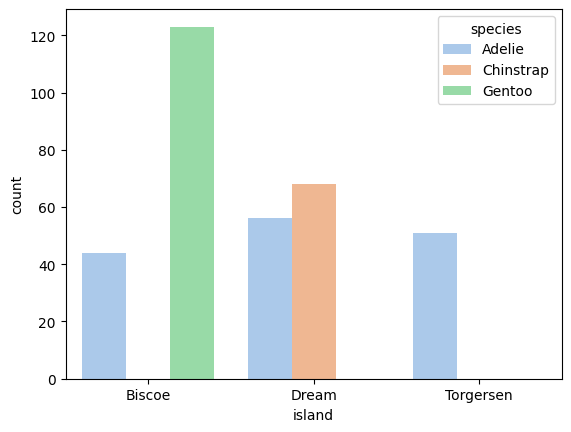

In [47]:
sns.countplot(data = cleaned_data,x = "island",hue = "species")

，`Adelie`种类的企鹅样本在`Biscoe`、`Dream`、`Torgersen`这三个岛上都有，而`Chinstrap`种类只在`Dream`岛上才有，`Gentoo`只在`Biscoe`岛上才有

### 不同岛屿上的企鹅性别数量

<Axes: xlabel='island', ylabel='count'>

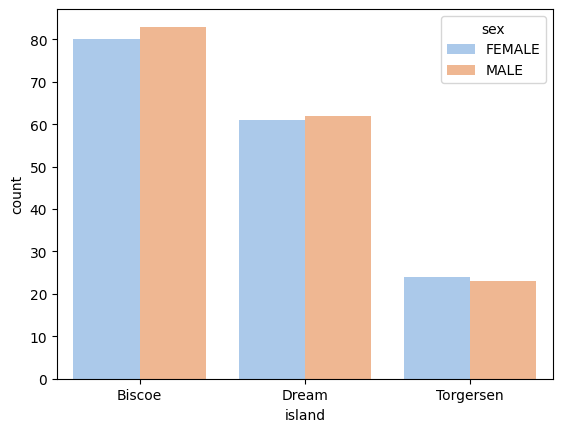

In [48]:
sns.countplot(cleaned_data,x = "island",hue = "sex")

只能说差不多，对于求偶者来说哪个岛都能去，哈哈

### 查看数值的相关性

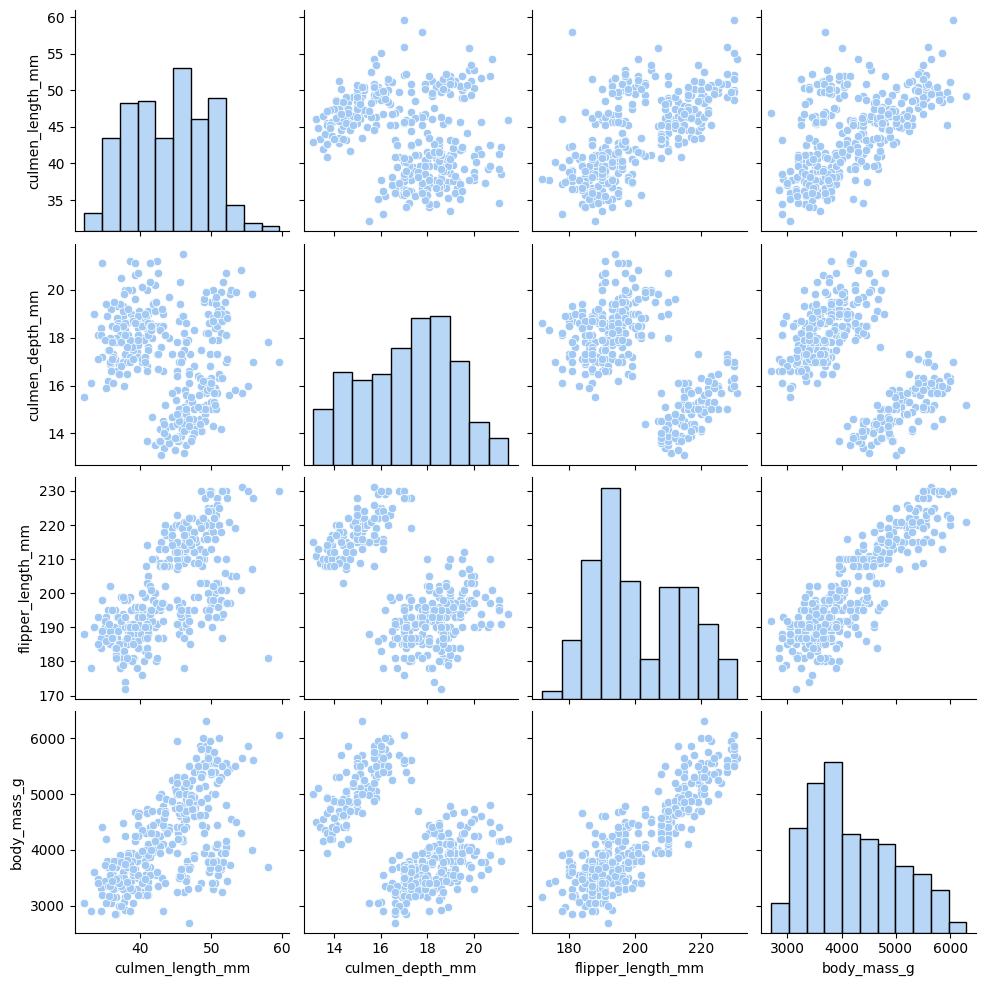

In [56]:
sns.pairplot(cleaned_data)

根据对角线的条形统计图来看，其根本来讲不属于正态分布，可能是数据过少的问题，总共才300多个数据，也不排除存在多组差异数据

而且很明显的看到企鹅存在集群，可能和种类、性别等一些因素有关

### 查看性别之间的相关性

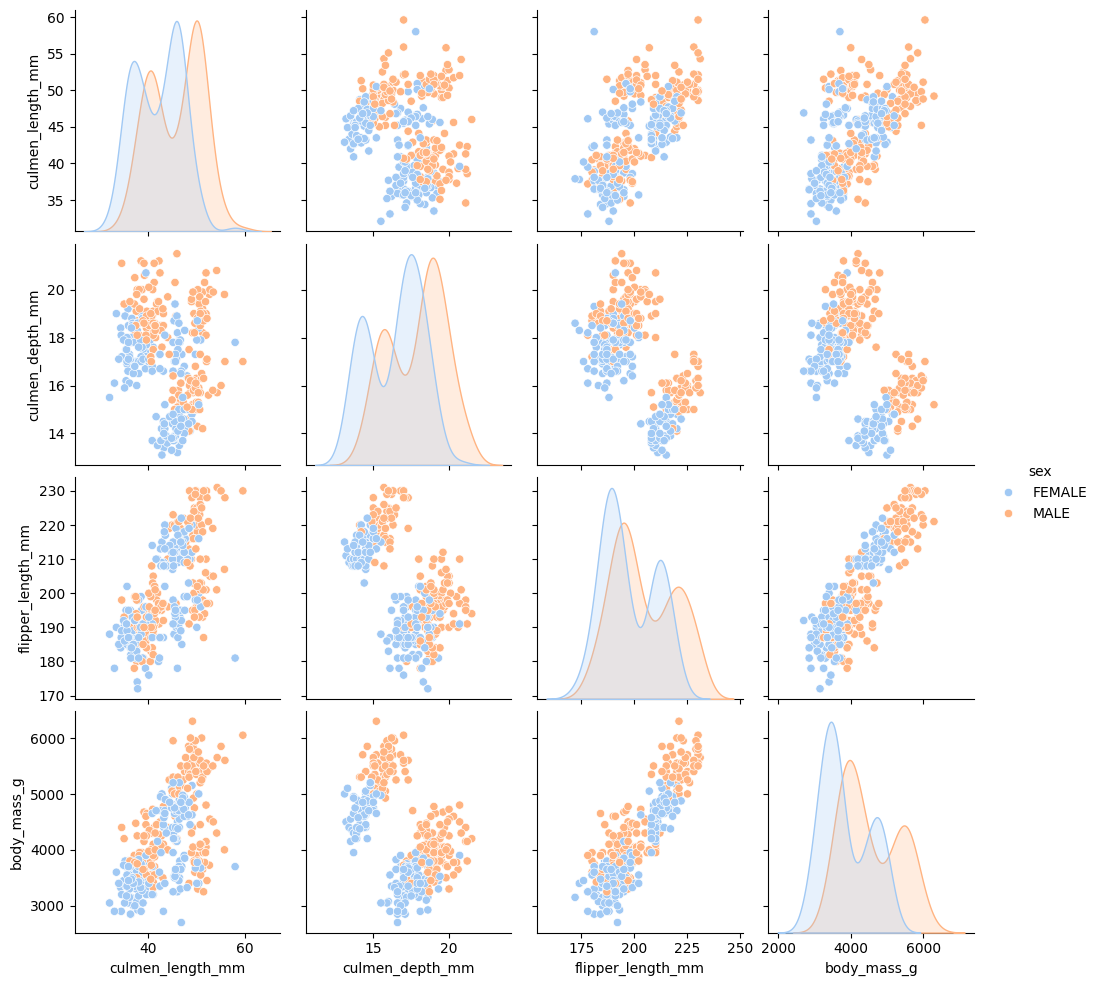

In [54]:
sns.pairplot(cleaned_data,hue = "sex")

从各方面来看，企鹅的雄性各个体征比女性的各个体征都要高

### 查看种类的相关性

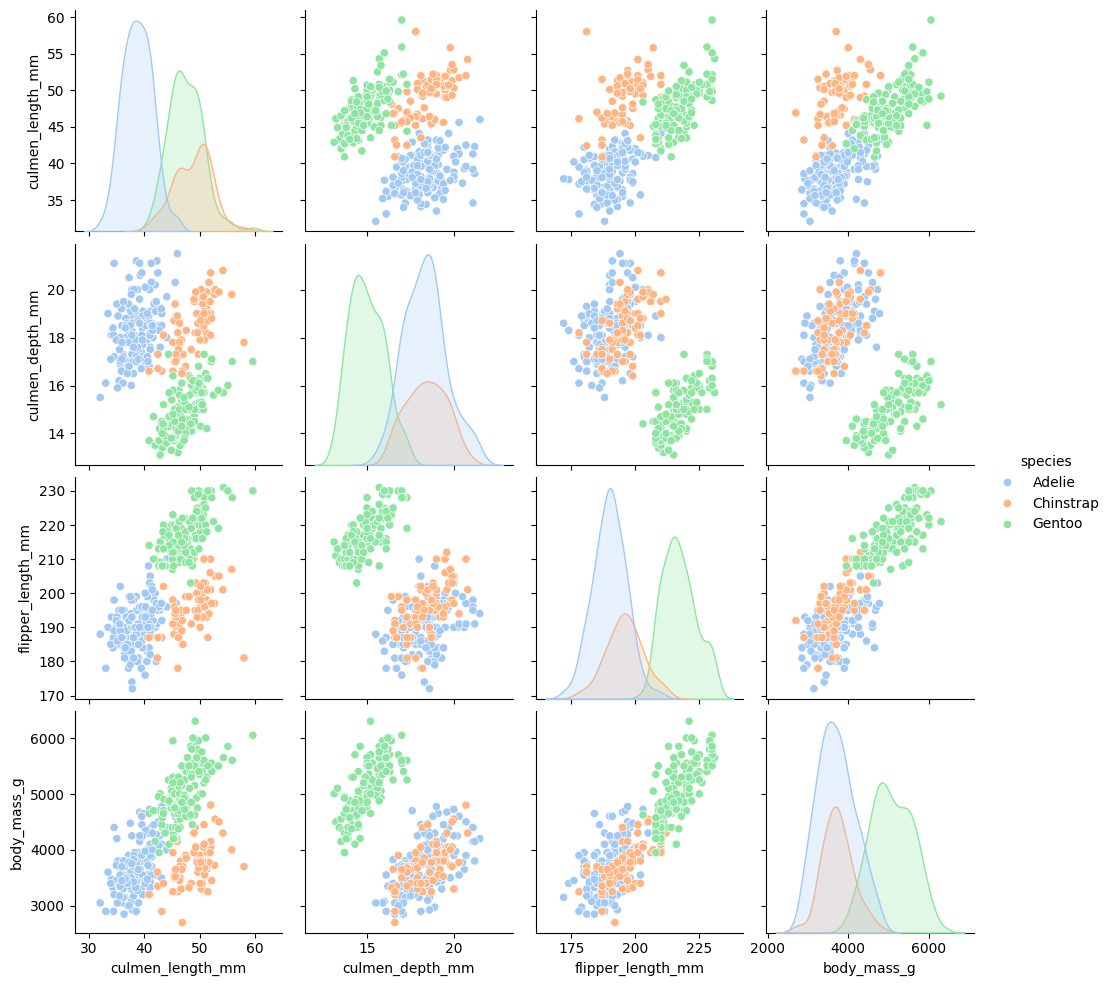

In [55]:
sns.pairplot(cleaned_data,hue = "species")

同一种类的企鹅，在本身的特征上具有相关性，由此可以通过本身体征推断是否为同一种类，同理，也可通过同一种类来推断其本身体征的数值

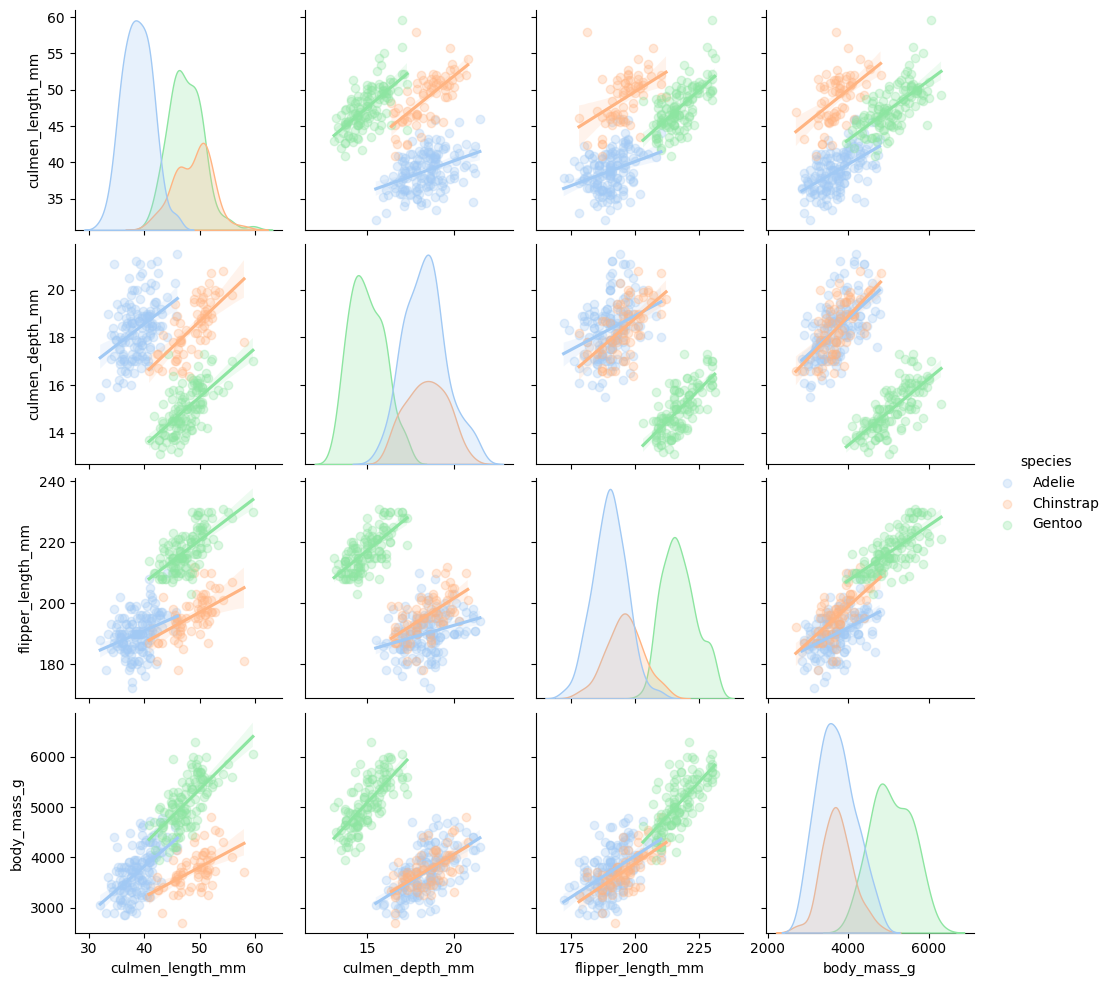

In [62]:
sns.pairplot(cleaned_data,hue = "species",kind = "reg",plot_kws = {'scatter_kws':{'alpha' : 0.3}})
plt.show()

使用回归线可以直观的看到他们的相关性，即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻。

有以下发现：

- `Chinstrap`与`Gentoo`的嘴峰长度较为接近,`Adelie`最短
- `Adelie`与`Chinstrap`的嘴峰深度较为接近,`Gentoo`最浅
- `Adelie`的鳍长度最短,`Chinstrap`中等,`Gentoo`最长
- `Adelie`与`Chinstrap`的体重较为接近,`Gentoo`最重

但不同种类的属性数值否存在统计显著性差异，仍然需要进行假设检验后才能得到结论。
